In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Problem 11: climate-related deaths

The Centre for Research on the Epidemiology of Disasters (CRED) within the University of Leuven maintains an [Emergency Events database](https://public.emdat.be/) covering over 20,000 mass disasters globally, starting from 1900.

In [3]:
# load Emergency Events data
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/emergency_events.csv'
data = pd.read_csv(path,index_col='Year')
data

,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,Continent,Total Deaths
Year,,,,,,,
1900,Natural,Climatological,Drought,Drought,Cabo Verde,Africa,11000.0
1900,Natural,Climatological,Drought,Drought,India,Asia,1250000.0
1904,Natural,Meteorological,Storm,Tropical cyclone,Bangladesh,Asia,NaN
1906,Natural,Hydrological,Flood,NaN,Belgium,Europe,6.0
1906,Natural,Hydrological,Flood,NaN,Belgium,Europe,NaN
...,...,...,...,...,...,...,...
2022,Natural,Hydrological,Flood,NaN,Yemen,Asia,17.0
2022,Natural,Hydrological,Flood,NaN,South Africa,Africa,3.0
2022,Natural,Hydrological,Flood,NaN,South Africa,Africa,4.0


Compute the total number of deaths by year and disaster type. 
Assign the results to a new `DataFrame` named `deaths`

In [8]:
# Compute the total number of deaths by year and disaster type. 
# Assign the results to a new `DataFrame` named `deaths`

deaths = data.drop(columns=['Disaster Group', 'Disaster Subgroup', 'Disaster Subtype', 'Country', 'Continent']).groupby(['Year','Disaster Type']).sum().unstack()
deaths

Total Deaths                                    
Disaster Type      Drought Extreme temperature   Flood   Storm
Year                                                          
1900             1261000.0                 NaN   300.0  6000.0
1902                   NaN                 NaN     NaN   600.0
1903                   0.0                 NaN   250.0   163.0
1904                   NaN                 NaN     NaN     0.0
1905                   NaN                 NaN     NaN   240.0
...                    ...                 ...     ...     ...
2018                   0.0               715.0  2881.0  1707.0
2019                  85.0              2909.0  5149.0  2514.0
2020                  45.0              6343.0  6185.0  1752.0
2021                   0.0              1044.0  4166.0  1876.0
2022                2465.0                29.0  3947.0   856.0

[120 rows x 4 columns]

In [5]:
# load world population data as a Series
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/world_population.csv'
pop = pd.read_csv(path,index_col='Year').squeeze()
pop

Year
1900    1.647405e+09
1901    1.658786e+09
1902    1.672564e+09
1903    1.687013e+09
1904    1.701647e+09
            ...     
2018    7.631081e+09
2019    7.713458e+09
2020    7.794789e+09
2021    7.874956e+09
2022    7.953943e+09
Name: world_population, Length: 123, dtype: float64

Plot the world population by year

<Axes: xlabel='Year'>

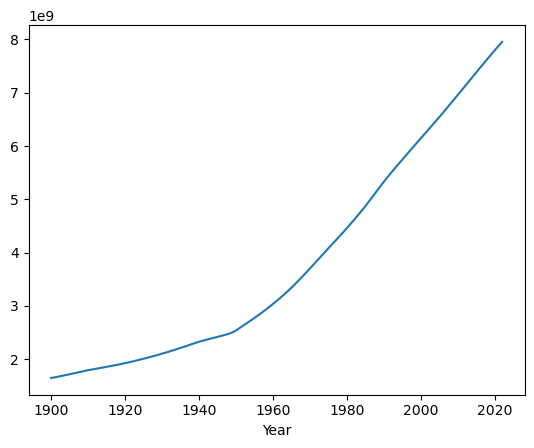

In [9]:
pop.plot()

Compute the number of deaths per 100,000 population by year and disaster type.
Assign the results to a new DataFrame called `rel_deaths`.

Hint: you want to divide each row of the `deaths` DataFrame by the corresponding population.
To do this, you need to use the `.divide()` DataFrame method with the `axis` parameter set to 0.

In [11]:
rel_deaths = deaths.div(pop,axis=0)
rel_deaths

Total Deaths                                                
Disaster Type       Drought Extreme temperature         Flood         Storm
Year                                                                       
1900           7.654463e-04                 NaN  1.821046e-07  3.642092e-06
1901                    NaN                 NaN           NaN           NaN
1902                    NaN                 NaN           NaN  3.587306e-07
1903           0.000000e+00                 NaN  1.481909e-07  9.662049e-08
1904                    NaN                 NaN           NaN  0.000000e+00
...                     ...                 ...           ...           ...
2018           0.000000e+00        9.369577e-08  3.775350e-07  2.236904e-07
2019           1.101970e-08        3.771330e-07  6.675346e-07  3.259238e-07
2020           5.773088e-09        8.137488e-07  7.934788e-07  2.247655e-07
2021           0.000000e+00        1.325722e-07  5.290188e-07  2.382236e-07
2022           3.099092e-07        3.645991e-09  4.962319e-07  1.076196e-07

[123 rows x 4 columns]

Calculate and plot the **decade** average annual number of deaths per 100,000 by disaster type. Use a bar plot.

Hint: group by `10*(rel_deaths.index//10)`

<Axes: xlabel='Year'>

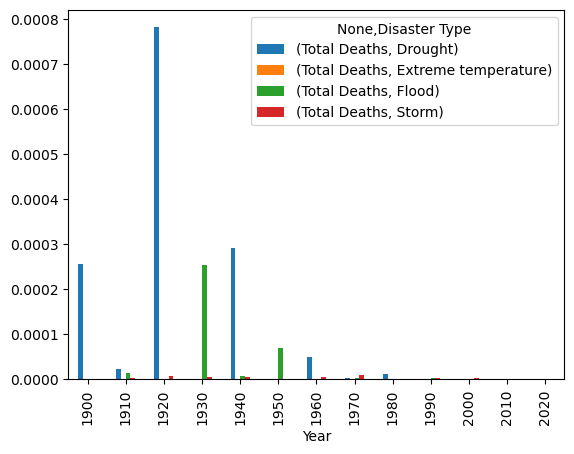

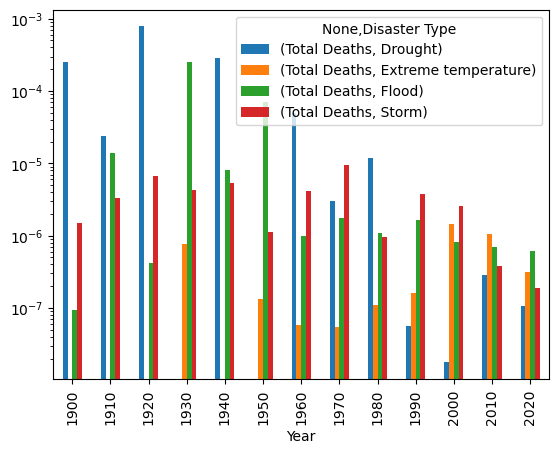

In [13]:
# decade average 
rel_deaths.groupby(rel_deaths.index//10*10).mean().plot(kind='bar')
# log scale
rel_deaths.groupby(rel_deaths.index//10*10).mean().plot(kind='bar',logy=True)